### In this course I am learning about the data pre processing  with "Rishi Bansal" hindi verson

Why the data are pre processed, how they are preprocessed?

since before using the data they must be pre processed just like the raw petrol is preprocessed before using it into any vehicle. Otherwise, it will damage the vehicle.


If very small data is  missing, the whole column can be discarded.
some time same information is written twice for example length can be writen in meter and cm. In this case one of them can be neglected.

Types of data preprocessing

1. check for null values
best way to solve this problem is remove or ipmute the column values
that means either remove the whole column aor replace the values witha meaningful numbers.

df.isnull().values.any()\\\\\\\\\
df=df.dropna(how='any',axis=0)

In [1]:
import pandas as pd

across the rows the parameters are independent.


In [12]:
df = pd.read_csv("./pd_data.csv") #file is uloaded from  github.com/bansalrishi/MachineLearningWithPython_UD 

In [14]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


### Now letus print all of the Null values


In [15]:
df.isnull().values.any() 

False

Looks tere is no any null value. Since 0 is present in the data. 0 is not a null value. Or Null value means a blank position in any of the row. If the null value is present in the data, one solution is remove the whole row.

If there are so many blank values in the data in that case impute method is used.

To delete a column
df = df.dropna(how='any', axis=0)\\


## 2. correlated feature check

num_preg	glucose_conc	diastolic_bp	thickness	 all are the features. Sometimes they are also called the variables

some times the feautures are correlated. That means they are increasing or decreasing correlatively

To handle the problem, removeone of the feature.
First of all lets see the correlation

In [17]:
df.corr() # will give the correlation in terms of number

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


There are total 10features which are :num_preg	glucose_conc	diastolic_bp	thickness	insulin	bmi	diab_pred	age	skin	diabetes

All of the diagonal are one because it is the same element or it is the same feature. But now, the correlation with one another is not one :
for example:  num_preg  vs glucose_conc is not 1

Now go to the thickness which is 4t row in the top left column. The thickness and skin both has value 1. That means both has the same impact.
Neew one out of 2, either the thickness or the skin.
The same thin can be found in the skin row which is second last row in the 1st column.

Let us plot it in the form of pi plot

In [18]:
import matplotlib.pyplot as plt

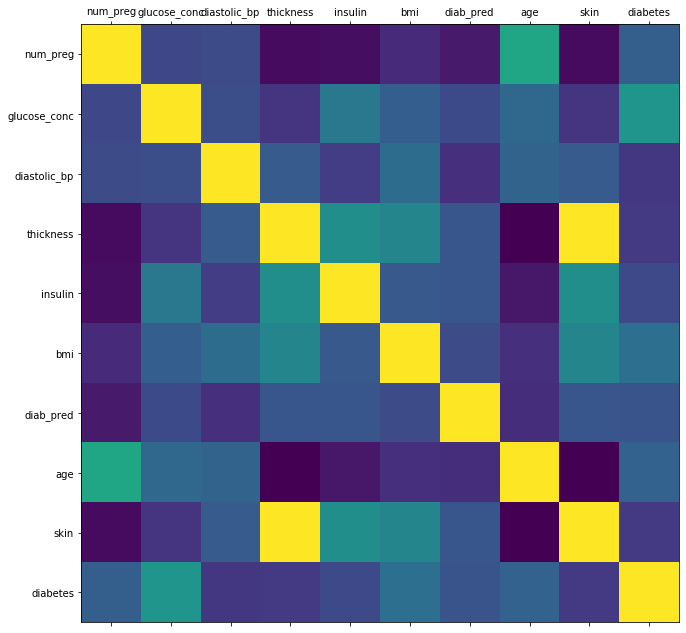

In [24]:
def plot_df(df,size=11):
    corr=df.corr()  # all of the data is stored in a variable
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr) # will show the heat map
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
plot_df(df)

The diagonalyellow color is 1 and the other yelloecolors are also 1. Out of two columns we have to delete one.

In [25]:
del df['skin']


In [27]:
df.head() # the skin column is gone now.

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


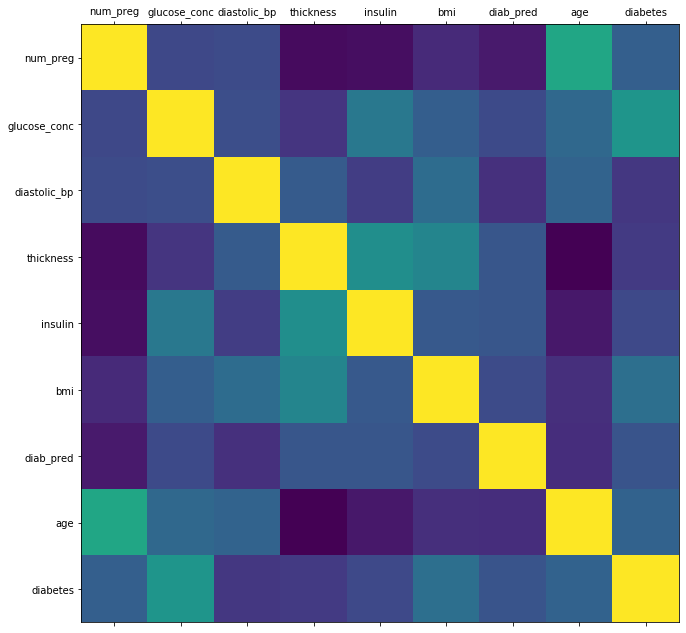

In [28]:
plot_df(df) # no more yelloexcept the diagonal, means non of the features are correlated to each other.

## 3. data molding (Encoding)

In this method one form of data is changed in to the other

for example, one column has the True and False data. Can be changed in to the numerical data. In this example, the diabites column is not numerical form.

In [29]:
diab_map = {True:1,False:0}
df['diabetes'] = df['diabetes'].map(diab_map)
df.head()  # the True and False are now converted to 1 and 0 respectively.

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 5. Splitting the data

The whole data is splitted. for example splitted into two parts 30% and 70%.
then take 70% data, the mchine will learn from the 70% of the data. Once the model is completed, then the next step is to test the data.
Otherwise it is hard to say the trained data is working well. We need to unsedstand the following terms

variance: is the amount of estimate of the target function will change the given different training data. In other words, the predicted value is predicting how accurate. Or how far from the actual value.

If you made the training set to 30%, the model will not be trained well.
The mathematical formula will not accurate resulting less accurate predictions.
if 90% tarining is taken, it will give the good mathematical formula, but the test data is very less because there is less reading. The result is again far from the actual value.

The independent variables will be saved in the variable x and y. Because the computer doesn't know which one is the dependent variable and which one is the independent variable

In [54]:
#video #6
from sklearn.model_selection import train_test_split
feature_col_name = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age','diabetes']
predicted_col_name =['diabetes']
x=df[feature_col_name].values
y=df[predicted_col_name].values
split_size =0.3  # 30% splitted  first data is splitted in x and y
# then the data need to be splitted in to train and test
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=split_size,random_state=42)
# x= full set of the independent variables, y is independent variable which is the predicted one
# training size is 70 % and test size is 30
#random_state=42 meaning  the 70 and 30 % are the random numbers not the continuous
# each time it will take the same random numbers


#Now the next step is test
print("Training set {0:0.2f}%".format((float(len(x_train))/float(len(df.index)))*100))
#df.index = total length of data
print("Test set {0:0.2f}%".format((float(len(x_test))/float(len(df.index)))*100))

# This verifies that our split is correct

Training set 69.92%
Test set 30.08%


## 6. impute Missing Data

### Drop rows     and Replace values

If the data is missing or blank value
we can drop the rows
another method to handle the missing
the  missing data is replaced by a value


In [57]:
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0, strategy="mean") # mean is the replacement value
x_train=fill_0.fit_transform(x_train) # new value will be stored in x_train
x_test=fill_0.fit_transform(x_test) # execute it
print(x_train) # All of the 0 are replaced by mean

[[  1.          95.          60.         ...   0.26        22.
    1.        ]
 [  5.         105.          72.         ...   0.159       28.
    1.        ]
 [  4.34056399 135.          68.         ...   0.365       24.
    1.        ]
 ...
 [ 10.         101.          86.         ...   1.136       38.
    1.        ]
 [  4.34056399 141.          72.24131274 ...   0.205       29.
    1.        ]
 [  4.34056399 125.          96.         ...   0.262       21.
    1.        ]]


## 7. Data Standardization( feature Scaling)

feature scaling is technique to standarize the independent features present in the data ina fixed range.


example: two feature, one column has exam score in GPA ( 1 to 10) and in the next column slaraly ( 100k)
     the renge diff is very big

It is performed during the data pre-processing to handle the highly varying magnitude or values or units.
z = (x-\mu)/\sigma

Disadvantage:
    higher values has higher priority and lower values has lower priority.
    example: the GPA has lowe values has lower priority and salary will get higher priority which is not correct

In [52]:
import pandas as pd
from sklearn import preprocessing
Exam_Data = pd.read_csv("./exam_data.csv",quotechar='"')
Exam_Data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,male,group E,associate's degree,standard,completed,79.0,75.0,81.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,female,group C,associate's degree,free/reduced,none,56.0,65.0,64.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let us convert the integer data in to the float other wise later we will  have an error

In [53]:
Exam_Data[['math score']]=Exam_Data[['math score']].astype(float)
Exam_Data[['reading score']]=Exam_Data[['reading score']].astype(float)
Exam_Data[['writing score']]=Exam_Data[['writing score']].astype(float)

Exam_Data[['math score']]= preprocessing.scale(Exam_Data[['math score']])
Exam_Data[['reading score']]= preprocessing.scale(Exam_Data[['reading score']])
Exam_Data[['writing score']]= preprocessing.scale(Exam_Data[['writing score']])

What we did is : converted the integer in to float and then store it back in to the same variable

In [54]:
Exam_Data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,male,group E,associate's degree,standard,completed,0.994557,0.574138,1.049901
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,female,group C,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


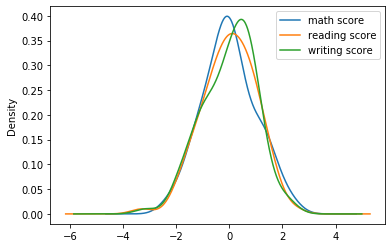

In [15]:
df_plot= Exam_Data[['math score', 'reading score','writing score']].copy() # copied in a variable
df_plot.plot.kde()

## 7. Label Encoding

convert the text values to the numbers. There are only two values in your data. The values will then become 0/1 effectively a binary representation.
Label encoding is used where we have a meaningful comparision

gender male female, there is relation

In [55]:
import pandas as pd
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
Exam_Data['gender']=le.fit_transform(Exam_Data['gender'].astype(str))
Exam_Data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,group E,associate's degree,standard,completed,0.994557,0.574138,1.049901
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,group C,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476
4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 8. One Hot Encoding

This method is used when there is no relation between the text values. After using this, for each value a column is created and values are filled in the form of 0 and 1.

In [49]:
print(le.classes_)

['0' '1' '2']


In [56]:
Exam_Data=pd.get_dummies(Exam_Data,columns=['race/ethnicity','parental level of education','lunch','test preparation course'])
Exam_Data.head(5)

,gender,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,2,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.994557,0.574138,1.049901,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0
2,2,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,-0.646391,-0.169564,-0.178476,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4,2,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Race/ethnicity had 5 groups A, B, C D abd E. It created one table for each group
First value is part of grou E, its value =1 and all other = 0
The second is group C